* #### LIF neurons (CUBA)

In [1]:
from brian2 import* 
%matplotlib inline


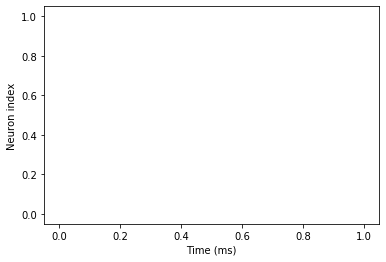

In [3]:
Vt = -0.4*mV #threshold
Vre =-0.7*mV #reset
El = -0.4*mV # resting potential

taum = 20*ms #membrane time constant
taue = 5*ms  #excitatory synaptic time constant
taui = 10*ms #inhibatory synaptic time constant

we = (60*0.30/10)*mV
wi = (-20*4.5/10)*mV 

eqs ='''
        dv/dt  = (ge-gi-(v-El))/taum : volt
        dge/dt = -ge/taue            : volt
        dgi/dt = -gi/taui            : volt
        '''

G = NeuronGroup(250,eqs,threshold="v>Vt", reset='v=Vre',refractory = 5*ms, method = 'linear')
G.v = 'Vre + rand() * (Vt - Vre)'
G.ge = 0*mV
G.gi = 0*mV

#connections/synapses

Ce = Synapses(G, G, on_pre='ge += we')
Ci = Synapses(G, G, on_pre='gi += wi')
Ce.connect("i<200", p = 0.03) 
Ci.connect("i>=200", p= 0.03) 


M = SpikeMonitor(G)

run(1*second)

#plot

plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()


In [5]:
from brian2tools import plot_raster

In [ ]:
plot_raster(M.i, M.t, time_unit=second, color='k')

* #### Test MotionCloud